In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    IN_COLAB = True
except:
    IN_COLAB = False

Mounted at /content/drive


In [ ]:
if IN_COLAB:
    !pip install "top2vec[sentence_encoders]"
    !pip install "umap-learn[plot]"
    !pip install unidecode
    !pip install word2number
    !pip install contractions
    !python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 62.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 107.5 MB/s eta 0:00:00
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 74.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039172 sha256=a909a1db65ff42b468ee9c5798a0f2f4995817162809bf81ad4082a2e21e2634
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.

In [ ]:
import os

if IN_COLAB:
    root_path = '/content/drive/Othercomputers/My MacBook Pro/HawaiiNewsAndTweets'
    os.chdir(root_path)
else:
    root_path = os.getcwd()
    os.chdir(root_path)

In [ ]:
import sys
sys.path.append('../')
from Top2VecDT.preprocessing import preprocess
from Top2VecDT.top2vec_custom import Top2Vec

import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations

import umap
import umap.plot
import tensorflow as tf
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

if tf.config.list_physical_devices(device_type='GPU') != []:
    print('GPU Detected')
else:
    print('GPU Not Detected')

GPU Detected


In [ ]:
df1 = pd.read_csv('./Hawaii-rebuilding/Hawaii-rebuilding - Sep 14, 2023 - 7 56 15 PM.csv')
df2 = pd.read_csv('./Hawaii-rebuilding/Hawaii-rebuilding - Sep 14, 2023 - 7 56 56 PM.csv')
df3 = pd.read_csv('./Hawaii-rebuilding/Hawaii-rebuilding - Sep 14, 2023 - 7 57 36 PM.csv')
df4 = pd.read_csv('./Hawaii-rebuilding/Hawaii-rebuilding - Sep 14, 2023 - 7 58 27 PM.csv')
df5 = pd.read_csv('./Hawaii-rebuilding/Hawaii-rebuilding - Sep 14, 2023 - 7 59 18 PM.csv')
df6 = pd.read_csv('./Hawaii-rebuilding/Hawaii-rebuilding - Sep 14, 2023 - 7 59 48 PM.csv')
df = pd.concat([df1, df2, df3, df4, df5]).reset_index(drop=True)

# Check if source is only twitter
df = df[df['Source'] != 'Twitter'].reset_index(drop=True)
assert 'Twitter' not in df['Source'].unique()

# Check if language is only english
df = df[df['Language']=='English']
assert df['Language'].unique() == ['English']

# Preprocess Data
df_new = preprocess(df, 'Hit Sentence')

2023-09-18 04:59:14,298 - preprocessing - INFO - Starting preprocess
INFO:preprocessing:Starting preprocess
2023-09-18 04:59:14,299 - preprocessing - INFO - Replacing N-grams...
INFO:preprocessing:Replacing N-grams...
2023-09-18 05:03:15,951 - preprocessing - INFO - General Preprocessing...
INFO:preprocessing:General Preprocessing...


In [ ]:
df_new.head(2)

,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,Language,...,Comments,Shares,Reactions,Threads,Is Verified,Parent URL,Document Tags,Initial_conv,Final_conv,Initial_conv_preprocessed
0,14-Sep-2023 12:43PM,Will speak at local entrepreneur networking event,https://biz.crast.net/will-speak-at-local-entr...,NaN,"... in Dubai, South America, the Caribbean, Al...",Crast.net,Shawn Johnson,United States,NaN,English,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"... in Dubai, South America, the Caribbean, Al...","... in Dubai, South America, the Caribbean, Al...",dubai south america caribbean alaska africa eu...
1,14-Sep-2023 12:39PM,Lawsuit: Green Greed behind Lahaina Deaths,https://www.HawaiiFreePress.com/Articles-Main/...,NaN,... and property due to the Maui Fire on Augus...,Hawaii Free Press,NaN,United States,Hawaii,English,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,... and property due to the Maui Fire on Augus...,... and property due to the Maui Fire on Augus...,property august rice v. pende


In [ ]:
df_new = df_new[['Hit Sentence', 'Initial_conv_preprocessed']]
df_new = df_new.dropna().reset_index(drop=True)
df_new.head()

,Hit Sentence,Initial_conv_preprocessed
0,"... in Dubai, South America, the Caribbean, Al...",dubai south america caribbean alaska africa eu...
1,... and property due to the Maui Fire on Augus...,property august rice v. pende
2,... are called the living atlas of the world. ...,call live atla world build network electric ve...
3,... and property due to the Maui Fire on Augus...,property august rice v. pende
4,... maps called the Living Atlas of the World....,map call live atla world build network electri...


In [ ]:
df_new.to_csv("./data/rebuilding_news.csv", index=False)

# Iterations

In [ ]:
# Load df and convert to document list
df_new = pd.read_csv("./data/rebuilding_news.csv")

docs = [str(i) for i in df_new['Initial_conv_preprocessed'].tolist()]

In [ ]:
# Pre process Stop words
docs_new = []
for doc in docs:
    if "rebuilding" in doc:
        docs_new.append(doc.replace("rebuilding", ""))
    elif "rebuild" in doc:
        docs_new.append(doc.replace("rebuild", ""))
    elif "build" in doc:
        docs_new.append(doc.replace("build", ""))
    if "missle" in doc:
        docs_new.append(doc.replace("missle", "missile"))
    else:
        docs_new.append(doc)

docs = docs_new

In [ ]:
# Testing multiple iteration of algorithm

testing_df = pd.DataFrame(columns = ['Iteration Number', 'Cluster Size', 'Sample size', 'neighbors', 'components', 'min_dist',
                                 'Silhouette score', 'Number of Topics', 'Topic Distribution', 'Topic_words'])
testing_df.to_excel('./outputs/rebuilding_news_output.xlsx', index=False)

testing_df_index = 0
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

mcs_list = [0.025, 0.05, 0.1]
for iter_no in range(1): # Multiple iterations of same parameter combinations
    for idex, mcs_ in enumerate(mcs_list): # min_cluster_size
        for ms_ in [0.1, 0.25, 0.5, 0.75]: # min_samples
            for n_neig in [3, 5, 7, 9]:
                for n_comp in [3, 5]:
                    for mini_dist in [0.25, 0.1]:
                        mcs = int(mcs_ * len(docs))
                        ms = int(ms_ * mcs)
                        print('Try: ', iter_no, mcs, ms, n_neig, n_comp, mini_dist)
                        try:
                            print("Model Start")
                            model_all = Top2Vec(documents= docs,
                                                speed='fast-learn', workers=8,
                                                embedding_model='universal-sentence-encoder-large',
                                                dataset_type = 'rebuilding_news_embedding',
                                                use_cached = True,
                                                min_count = 3, # Ignore words whose freq is lower than this
                                                umap_args={'n_neighbors': n_neig,
                                                           'n_components': n_comp,
                                                           'metric':'wminkowski',
                                                           'min_dist':mini_dist,
                                                           'random_state':42
                                                           },
                                                args={'min_cluster_size':mcs, # Number of points to be called a cluster
                                                      'min_samples':ms, # Control noise labelling
                                                      'cluster_selection_method':'leaf',
                                                      'prediction_data': True
                                                      },
                                                clustering_model='hdbscan')
                            print("Model End")
                            print()

                            topic_sizes, topic_nums = model_all.get_topic_sizes()
                            print(topic_sizes, topic_nums)

                            sil_score = silhouette_score(model_all.umap_cls.embedding_, model_all.cluster_cls.labels_)
                            print("Silhoeutte Score: ",sil_score)
                            print("Index: ",testing_df_index)

                            testing_df_index = testing_df_index + 1

                            topic_size_list = topic_sizes.tolist()
                            topic_size_string = ', '.join(str(num) for num in topic_size_list)

                            topic_words, word_scores, topic_nums = model_all.get_topics()
                            my_list = []

                            for i in range(model_all.get_num_topics()):
                                my_list.append((topic_words[i][:10]))

                            testing_df.loc[testing_df_index, 'Iteration Number'] = iter_no
                            testing_df.loc[testing_df_index, 'Cluster Size'] = mcs
                            testing_df.loc[testing_df_index, 'Sample size'] = ms
                            testing_df.loc[testing_df_index, 'neighbors'] = n_neig
                            testing_df.loc[testing_df_index, 'components'] = n_comp
                            testing_df.loc[testing_df_index, 'min_dist'] = mini_dist
                            testing_df.loc[testing_df_index, 'Silhouette score'] = sil_score
                            testing_df.loc[testing_df_index, 'Number of Topics'] = model_all.get_num_topics()
                            testing_df.loc[testing_df_index, 'Clustering Algorithm used'] = 'HDBSCAN'
                            testing_df.loc[testing_df_index, 'Topic Distribution'] = topic_size_string
                            testing_df.loc[testing_df_index, 'Topic_words'] = str(my_list)

                            testing_df.to_excel('./outputs/rebuilding_news_output.xlsx', index=False)
                            print(testing_df.iloc[-1])
                        except Exception as e:
                            print('Error: ' , e)
                            continue
                        print("\n=====================================\n")

2023-09-18 15:46:02,022 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 207 3 3 0.25
Model Start


2023-09-18 15:46:58,679 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f751c1c6650>
Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 15:47:09,107 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Error:  Input X contains NaN.
SpectralEmbedding does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


2023-09-18 15:47:32,334 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 207 3 3 0.1
Model Start


2023-09-18 15:47:39,552 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c8bdc610>


2023-09-18 15:47:40,114 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 15:47:43,350 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Error:  Input X contains NaN.
SpectralEmbedding does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
Try:  0 2073 207 3 5 0.25
Model Start


2023-09-18 15:47:50,491 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c8e60070>


2023-09-18 15:47:51,012 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 15:50:05,787 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 15:50:17,177 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 15:50:17,232 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 15:51:37,437 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.032981236
Index:  0
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                                207
neighbors                                                                    3
components                                                                   5
min_dist                                                                  0.25
Silhouette score                                                     -0.032981
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 1, dtype: object


Try:  0 2073 207 3 5 0.1
Model Start


2023-09-18 15:51:44,607 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c9e83f40>


2023-09-18 15:51:45,131 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 15:53:59,049 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 15:54:08,071 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 15:54:08,117 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 15:55:28,504 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  0.0012952202
Index:  1
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                                207
neighbors                                                                    3
components                                                                   5
min_dist                                                                   0.1
Silhouette score                                                      0.001295
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 2, dtype: object


Try:  0 2073 207 5 3 0.25
Model Start


2023-09-18 15:55:35,726 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c53ee620>


2023-09-18 15:55:36,269 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 16:04:46,921 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 16:04:55,997 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 16:04:56,031 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 16:06:25,253 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.14738667
Index:  2
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                                207
neighbors                                                                    5
components                                                                   3
min_dist                                                                  0.25
Silhouette score                                                     -0.147387
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 3, dtype: object


Try:  0 2073 207 5 3 0.1
Model Start


2023-09-18 16:06:32,420 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4e7b4c0>


2023-09-18 16:06:32,974 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 16:15:42,660 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 16:15:50,731 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 16:15:50,779 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 16:17:15,819 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.105332464
Index:  3
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                                207
neighbors                                                                    5
components                                                                   3
min_dist                                                                   0.1
Silhouette score                                                     -0.105332
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 4, dtype: object


Try:  0 2073 207 5 5 0.25
Model Start


2023-09-18 16:17:23,084 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c9822470>


2023-09-18 16:17:23,598 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 16:24:11,970 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 16:24:24,361 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 16:24:24,409 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 16:25:47,013 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.027797662
Index:  4
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                                207
neighbors                                                                    5
components                                                                   5
min_dist                                                                  0.25
Silhouette score                                                     -0.027798
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 5, dtype: object


Try:  0 2073 207 5 5 0.1
Model Start


2023-09-18 16:25:54,981 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c446c8e0>


2023-09-18 16:25:55,530 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 16:32:45,735 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 16:32:56,586 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 16:32:56,642 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 16:34:17,206 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.041962523
Index:  5
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                                207
neighbors                                                                    5
components                                                                   5
min_dist                                                                   0.1
Silhouette score                                                     -0.041963
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 6, dtype: object


Try:  0 2073 207 7 3 0.25
Model Start


2023-09-18 16:34:24,355 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c8e34eb0>


2023-09-18 16:34:24,891 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 16:41:53,199 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 16:42:02,059 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 16:42:02,084 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 16:43:32,962 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.1971229
Index:  6
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                                207
neighbors                                                                    7
components                                                                   3
min_dist                                                                  0.25
Silhouette score                                                     -0.197123
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 7, dtype: object


Try:  0 2073 207 7 3 0.1
Model Start


2023-09-18 16:43:40,974 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c418d330>


2023-09-18 16:43:41,516 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 16:51:07,125 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 16:51:15,272 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 16:51:15,322 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 16:52:37,311 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.053807843
Index:  7
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                                207
neighbors                                                                    7
components                                                                   3
min_dist                                                                   0.1
Silhouette score                                                     -0.053808
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 8, dtype: object


Try:  0 2073 207 7 5 0.25
Model Start


2023-09-18 16:52:44,383 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca483790>


2023-09-18 16:52:44,905 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 16:58:46,622 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 16:58:58,983 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 16:58:59,032 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 17:00:19,735 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.027502038
Index:  8
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                                207
neighbors                                                                    7
components                                                                   5
min_dist                                                                  0.25
Silhouette score                                                     -0.027502
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 9, dtype: object


Try:  0 2073 207 7 5 0.1
Model Start


2023-09-18 17:00:27,582 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f7523539d80>


2023-09-18 17:00:28,162 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 17:06:34,812 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 17:06:45,618 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 17:06:45,662 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 17:08:11,016 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.0508806
Index:  9
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                                207
neighbors                                                                    7
components                                                                   5
min_dist                                                                   0.1
Silhouette score                                                     -0.050881
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 10, dtype: object


Try:  0 2073 207 9 3 0.25
Model Start


2023-09-18 17:08:18,100 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c9eddff0>


2023-09-18 17:08:18,660 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy
Error:  Input X contains NaN.
SpectralEmbedding does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


2023-09-18 17:08:23,121 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 207 9 3 0.1
Model Start


2023-09-18 17:08:30,251 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c41de140>


2023-09-18 17:08:30,785 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy
Error:  Input X contains NaN.
SpectralEmbedding does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


2023-09-18 17:08:34,946 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 207 9 5 0.25
Model Start


2023-09-18 17:08:42,896 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca693340>


2023-09-18 17:08:43,438 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 17:11:05,545 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 17:11:16,481 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 17:11:16,528 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 17:12:33,969 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.0036949771
Index:  10
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                                207
neighbors                                                                    9
components                                                                   5
min_dist                                                                  0.25
Silhouette score                                                     -0.003695
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 11, dtype: object


Try:  0 2073 207 9 5 0.1
Model Start


2023-09-18 17:12:41,069 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca6a5990>


2023-09-18 17:12:41,628 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 17:14:59,608 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 17:15:08,975 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 17:15:09,024 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 17:16:26,006 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  0.04319658
Index:  11
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                                207
neighbors                                                                    9
components                                                                   5
min_dist                                                                   0.1
Silhouette score                                                      0.043197
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 12, dtype: object


Try:  0 2073 518 3 3 0.25
Model Start


2023-09-18 17:16:33,960 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74cb531960>


2023-09-18 17:16:34,621 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy
Error:  Input X contains NaN.
SpectralEmbedding does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
Try:  0 2073 518 3 3 0.1
Model Start


2023-09-18 17:16:38,465 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-09-18 17:16:45,585 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c42e9d20>


2023-09-18 17:16:46,120 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 17:16:49,051 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Error:  Input X contains NaN.
SpectralEmbedding does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
Try:  0 2073 518 3 5 0.25
Model Start


2023-09-18 17:16:57,182 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c8dcb6d0>


2023-09-18 17:16:57,735 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 17:19:11,115 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 17:19:33,032 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 17:19:33,065 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 17:21:01,376 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.1761962
Index:  12
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                                518
neighbors                                                                    3
components                                                                   5
min_dist                                                                  0.25
Silhouette score                                                     -0.176196
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 13, dtype: object


Try:  0 2073 518 3 5 0.1
Model Start


2023-09-18 17:21:08,459 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4492ce0>


2023-09-18 17:21:09,021 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 17:23:23,683 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 17:23:42,130 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 17:23:42,177 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 17:25:02,166 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.004264637
Index:  13
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                                518
neighbors                                                                    3
components                                                                   5
min_dist                                                                   0.1
Silhouette score                                                     -0.004265
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 14, dtype: object


Try:  0 2073 518 5 3 0.25
Model Start


2023-09-18 17:25:10,024 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c53872b0>


2023-09-18 17:25:10,564 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 17:34:09,502 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 17:34:26,438 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 17:34:26,467 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 17:35:51,041 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.19324867
Index:  14
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                                518
neighbors                                                                    5
components                                                                   3
min_dist                                                                  0.25
Silhouette score                                                     -0.193249
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 15, dtype: object


Try:  0 2073 518 5 3 0.1
Model Start


2023-09-18 17:35:58,249 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c9837400>


2023-09-18 17:35:58,779 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 17:45:08,380 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 17:45:25,091 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 17:45:25,127 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 17:46:52,709 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.18081883
Index:  15
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                                518
neighbors                                                                    5
components                                                                   3
min_dist                                                                   0.1
Silhouette score                                                     -0.180819
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 16, dtype: object


Try:  0 2073 518 5 5 0.25
Model Start


2023-09-18 17:47:00,125 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74cb4fbfa0>


2023-09-18 17:47:00,698 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 17:53:52,052 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 17:54:16,534 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 17:54:16,578 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 17:55:41,777 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.13633099
Index:  16
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                                518
neighbors                                                                    5
components                                                                   5
min_dist                                                                  0.25
Silhouette score                                                     -0.136331
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 17, dtype: object


Try:  0 2073 518 5 5 0.1
Model Start


2023-09-18 17:55:48,995 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4242e00>


2023-09-18 17:55:49,565 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 18:02:37,172 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 18:02:59,288 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 18:02:59,340 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 18:04:18,715 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.04761086
Index:  17
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                                518
neighbors                                                                    5
components                                                                   5
min_dist                                                                   0.1
Silhouette score                                                     -0.047611
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 18, dtype: object


Try:  0 2073 518 7 3 0.25
Model Start


2023-09-18 18:04:25,946 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f751c1c6500>


2023-09-18 18:04:26,521 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 18:11:48,829 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 18:12:05,729 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 18:12:05,757 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 18:13:35,397 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.14219376
Index:  18
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                                518
neighbors                                                                    7
components                                                                   3
min_dist                                                                  0.25
Silhouette score                                                     -0.142194
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 19, dtype: object


Try:  0 2073 518 7 3 0.1
Model Start


2023-09-18 18:13:43,396 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca75ec80>


2023-09-18 18:13:43,954 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 18:21:06,478 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 18:21:22,446 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 18:21:22,473 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 18:22:51,097 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.24599664
Index:  19
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                                518
neighbors                                                                    7
components                                                                   3
min_dist                                                                   0.1
Silhouette score                                                     -0.245997
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 20, dtype: object


Try:  0 2073 518 7 5 0.25
Model Start


2023-09-18 18:22:58,502 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca480220>


2023-09-18 18:22:59,048 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 18:29:01,045 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 18:29:24,707 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 18:29:24,746 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 18:30:47,968 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.0019293277
Index:  20
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                                518
neighbors                                                                    7
components                                                                   5
min_dist                                                                  0.25
Silhouette score                                                     -0.001929
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 21, dtype: object


Try:  0 2073 518 7 5 0.1
Model Start


2023-09-18 18:30:55,982 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74cb687490>


2023-09-18 18:30:56,540 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 18:36:55,808 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 18:37:16,967 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 18:37:17,010 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 18:38:38,964 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.031860765
Index:  21
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                                518
neighbors                                                                    7
components                                                                   5
min_dist                                                                   0.1
Silhouette score                                                     -0.031861
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 22, dtype: object


Try:  0 2073 518 9 3 0.25
Model Start


2023-09-18 18:38:46,129 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c8d46b30>


2023-09-18 18:38:46,676 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy
Error:  Input X contains NaN.
SpectralEmbedding does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


2023-09-18 18:38:50,875 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 518 9 3 0.1
Model Start


2023-09-18 18:38:58,813 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74cb50ff70>


2023-09-18 18:38:59,362 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy
Error:  Input X contains NaN.
SpectralEmbedding does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


2023-09-18 18:39:03,573 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 518 9 5 0.25
Model Start


2023-09-18 18:39:10,698 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca364460>


2023-09-18 18:39:11,254 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 18:41:28,926 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 18:41:50,750 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 18:41:50,793 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 18:43:12,255 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.060149215
Index:  22
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                                518
neighbors                                                                    9
components                                                                   5
min_dist                                                                  0.25
Silhouette score                                                     -0.060149
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 23, dtype: object


Try:  0 2073 518 9 5 0.1
Model Start


2023-09-18 18:43:19,360 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca6a76a0>


2023-09-18 18:43:19,914 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 18:45:36,857 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 18:45:56,380 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 18:45:56,427 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 18:47:15,566 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  0.020601595
Index:  23
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                                518
neighbors                                                                    9
components                                                                   5
min_dist                                                                   0.1
Silhouette score                                                      0.020602
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 24, dtype: object


Try:  0 2073 1036 3 3 0.25
Model Start


2023-09-18 18:47:23,388 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca3f2fe0>


2023-09-18 18:47:23,929 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 18:47:26,672 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Error:  Input X contains NaN.
SpectralEmbedding does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
Try:  0 2073 1036 3 3 0.1
Model Start


2023-09-18 18:47:34,161 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74cb4aa7d0>


2023-09-18 18:47:34,685 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy
Error:  Input X contains NaN.
SpectralEmbedding does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


2023-09-18 18:47:37,845 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 1036 3 5 0.25
Model Start


2023-09-18 18:47:45,458 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c8aff490>


2023-09-18 18:47:45,969 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 18:49:53,171 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 18:50:30,848 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 18:50:30,875 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 18:51:57,026 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.15300816
Index:  24
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                               1036
neighbors                                                                    3
components                                                                   5
min_dist                                                                  0.25
Silhouette score                                                     -0.153008
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 25, dtype: object


Try:  0 2073 1036 3 5 0.1
Model Start


2023-09-18 18:52:04,137 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f752353a230>


2023-09-18 18:52:04,697 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 18:54:11,998 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 18:54:48,349 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 18:54:48,408 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 18:56:04,644 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  0.020923957
Index:  25
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                               1036
neighbors                                                                    3
components                                                                   5
min_dist                                                                   0.1
Silhouette score                                                      0.020924
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 26, dtype: object


Try:  0 2073 1036 5 3 0.25
Model Start


2023-09-18 18:56:12,629 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c443c640>


2023-09-18 18:56:13,207 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 19:05:12,650 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 19:05:43,548 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 19:05:43,581 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 19:07:10,243 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.11291778
Index:  26
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                               1036
neighbors                                                                    5
components                                                                   3
min_dist                                                                  0.25
Silhouette score                                                     -0.112918
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 27, dtype: object


Try:  0 2073 1036 5 3 0.1
Model Start


2023-09-18 19:07:17,439 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74cb07fbe0>


2023-09-18 19:07:17,972 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 19:16:22,565 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 19:16:53,354 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 19:16:53,383 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 19:18:20,514 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.13599059
Index:  27
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                               1036
neighbors                                                                    5
components                                                                   3
min_dist                                                                   0.1
Silhouette score                                                     -0.135991
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 28, dtype: object


Try:  0 2073 1036 5 5 0.25
Model Start


2023-09-18 19:18:27,952 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c510b700>


2023-09-18 19:18:28,499 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 19:25:17,574 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 19:26:02,320 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 19:26:02,350 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 19:27:31,764 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.18798183
Index:  28
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                               1036
neighbors                                                                    5
components                                                                   5
min_dist                                                                  0.25
Silhouette score                                                     -0.187982
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 29, dtype: object


Try:  0 2073 1036 5 5 0.1
Model Start


2023-09-18 19:27:39,011 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c8dc9480>


2023-09-18 19:27:39,571 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 19:34:30,240 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-18 19:35:08,795 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-18 19:35:08,831 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


Model End

[82946] [0]


2023-09-18 19:36:31,501 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Silhoeutte Score:  -0.07870547
Index:  29
Iteration Number                                                             0
Cluster Size                                                              2073
Sample size                                                               1036
neighbors                                                                    5
components                                                                   5
min_dist                                                                   0.1
Silhouette score                                                     -0.078705
Number of Topics                                                             1
Topic Distribution                                                       82946
Topic_words                  [array(['evacuate', 'devastation', 'earthquake...
Clustering Algorithm used                                              HDBSCAN
Name: 30, dtype: object


Try:  0 2073 1036 7 3 0.25
Model Start


2023-09-18 19:36:38,812 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca7f7b50>


2023-09-18 19:36:39,366 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy


2023-09-18 19:43:48,149 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Error:  [Errno 107] Transport endpoint is not connected
Try:  0 2073 1036 7 3 0.1
Model Start


2023-09-18 19:43:56,871 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c511fa30>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:44:00,292 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 1036 7 5 0.25
Model Start


2023-09-18 19:44:07,553 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74d29583d0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:44:10,994 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 1036 7 5 0.1
Model Start


2023-09-18 19:44:18,274 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f752b5e51e0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:44:21,860 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 1036 9 3 0.25
Model Start


2023-09-18 19:44:30,029 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4e79720>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:44:33,520 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 1036 9 3 0.1
Model Start


2023-09-18 19:44:40,744 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c06eecb0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:44:44,142 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 1036 9 5 0.25
Model Start


2023-09-18 19:44:51,371 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c9d990c0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:44:54,779 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 1036 9 5 0.1
Model Start


2023-09-18 19:45:02,849 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c0700850>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:45:06,216 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 1554 3 3 0.25
Model Start


2023-09-18 19:45:13,493 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f751e978dc0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:45:16,842 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 1554 3 3 0.1
Model Start


2023-09-18 19:45:24,023 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c42cbe20>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:45:27,473 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 1554 3 5 0.25
Model Start


2023-09-18 19:45:35,561 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74cb606650>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:45:39,138 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 1554 3 5 0.1
Model Start


2023-09-18 19:45:46,355 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c8bdc6a0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:45:49,805 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 1554 5 3 0.25
Model Start


2023-09-18 19:45:57,947 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c06ec0d0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:46:01,322 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 1554 5 3 0.1
Model Start


2023-09-18 19:46:08,571 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c511c2b0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:46:11,932 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 1554 5 5 0.25
Model Start


2023-09-18 19:46:19,255 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c42ca050>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:46:22,599 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 1554 5 5 0.1
Model Start


2023-09-18 19:46:30,690 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c0701390>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:46:34,046 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 1554 7 3 0.25
Model Start


2023-09-18 19:46:41,296 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74d210c3a0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:46:44,695 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 1554 7 3 0.1
Model Start


2023-09-18 19:46:52,055 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c42c9d50>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:46:55,640 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 1554 7 5 0.25
Model Start


2023-09-18 19:47:03,854 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c446ca00>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:47:07,723 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 1554 7 5 0.1
Model Start


2023-09-18 19:47:15,154 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74cb5f55a0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:47:18,640 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 1554 9 3 0.25
Model Start


2023-09-18 19:47:26,097 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c447d870>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:47:29,552 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 1554 9 3 0.1
Model Start


2023-09-18 19:47:37,856 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f7523538940>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:47:41,320 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 1554 9 5 0.25
Model Start


2023-09-18 19:47:48,616 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca4a07c0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:47:52,008 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 2073 1554 9 5 0.1
Model Start


2023-09-18 19:47:59,326 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f751c25d7b0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:48:02,781 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 414 3 3 0.25
Model Start


2023-09-18 19:48:10,951 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca06bb50>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:48:14,347 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 414 3 3 0.1
Model Start


2023-09-18 19:48:21,598 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74cb0f5000>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:48:25,134 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 414 3 5 0.25
Model Start


2023-09-18 19:48:33,045 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca6529e0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:48:36,650 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 414 3 5 0.1
Model Start


2023-09-18 19:48:43,925 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c9d9a7a0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:48:47,306 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 414 5 3 0.25
Model Start


2023-09-18 19:48:54,591 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f751c25d240>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:48:57,991 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-09-18 19:49:06,181 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


Try:  0 4147 414 5 3 0.1
Model Start
<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74cb686dd0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:49:09,587 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 414 5 5 0.25
Model Start


2023-09-18 19:49:16,775 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c06ebd00>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:49:20,117 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 414 5 5 0.1
Model Start


2023-09-18 19:49:27,319 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f751c25e4d0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:49:30,641 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 414 7 3 0.25
Model Start


2023-09-18 19:49:38,732 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c9bd1120>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:49:42,094 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 414 7 3 0.1
Model Start


2023-09-18 19:49:49,254 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca3647f0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:49:52,825 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 414 7 5 0.25
Model Start


2023-09-18 19:49:59,943 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f751e97ae90>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:50:03,395 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 414 7 5 0.1
Model Start


2023-09-18 19:50:11,570 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4dc3220>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:50:14,931 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 414 9 3 0.25
Model Start


2023-09-18 19:50:22,060 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74d210cc70>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:50:25,394 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 414 9 3 0.1
Model Start


2023-09-18 19:50:32,497 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c8bdf940>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:50:35,805 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 414 9 5 0.25
Model Start


2023-09-18 19:50:43,699 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c511eef0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:50:47,039 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 414 9 5 0.1
Model Start


2023-09-18 19:50:54,162 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca798be0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:50:57,606 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 1036 3 3 0.25
Model Start


2023-09-18 19:51:04,824 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f751e978940>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:51:08,394 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 1036 3 3 0.1
Model Start


2023-09-18 19:51:16,419 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74cb5f60b0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:51:19,793 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 1036 3 5 0.25
Model Start


2023-09-18 19:51:26,979 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4451330>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:51:30,228 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 1036 3 5 0.1
Model Start


2023-09-18 19:51:38,078 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca4c8160>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:51:41,492 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 1036 5 3 0.25
Model Start


2023-09-18 19:51:48,579 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f7523538280>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:51:51,891 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 1036 5 3 0.1
Model Start


2023-09-18 19:51:58,991 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca4a2fb0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:52:02,402 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 1036 5 5 0.25
Model Start


2023-09-18 19:52:10,451 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f751e978fd0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:52:13,841 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 1036 5 5 0.1
Model Start


2023-09-18 19:52:20,900 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c06c5060>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:52:24,362 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 1036 7 3 0.25
Model Start


2023-09-18 19:52:31,441 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74cb4f94b0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:52:34,802 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 1036 7 3 0.1
Model Start


2023-09-18 19:52:42,820 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c41bc7f0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:52:46,235 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 1036 7 5 0.25
Model Start


2023-09-18 19:52:53,407 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c07eb640>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:52:56,706 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 1036 7 5 0.1
Model Start


2023-09-18 19:53:03,977 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca799c00>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:53:07,442 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 1036 9 3 0.25
Model Start


2023-09-18 19:53:15,586 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f7523539f00>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:53:18,978 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 1036 9 3 0.1
Model Start


2023-09-18 19:53:26,424 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c41befe0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:53:29,887 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 1036 9 5 0.25
Model Start


2023-09-18 19:53:37,220 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c8bdca90>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:53:40,913 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 1036 9 5 0.1
Model Start


2023-09-18 19:53:48,980 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca7b2980>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:53:52,574 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 2073 3 3 0.25
Model Start


2023-09-18 19:53:59,919 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca4a2350>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:54:03,354 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 2073 3 3 0.1
Model Start


2023-09-18 19:54:10,613 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c447f130>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:54:13,926 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 2073 3 5 0.25
Model Start


2023-09-18 19:54:21,901 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c9ddec80>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:54:25,238 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 2073 3 5 0.1
Model Start


2023-09-18 19:54:32,418 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c446dcf0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:54:35,801 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 2073 5 3 0.25
Model Start


2023-09-18 19:54:42,965 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4e160e0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:54:46,341 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 2073 5 3 0.1
Model Start


2023-09-18 19:54:54,383 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4f6f280>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:54:57,944 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 2073 5 5 0.25
Model Start


2023-09-18 19:55:05,116 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4dd0580>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:55:08,624 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 2073 5 5 0.1
Model Start


2023-09-18 19:55:16,498 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4f6dd80>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:55:19,878 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 2073 7 3 0.25
Model Start


2023-09-18 19:55:27,058 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f751e97a860>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:55:30,430 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 2073 7 3 0.1
Model Start


2023-09-18 19:55:37,726 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4e17760>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:55:41,089 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 2073 7 5 0.25
Model Start


2023-09-18 19:55:49,231 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c425c640>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:55:52,675 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 2073 7 5 0.1
Model Start


2023-09-18 19:55:59,862 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c8fb1780>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:56:03,242 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 2073 9 3 0.25
Model Start


2023-09-18 19:56:10,351 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74cb7236d0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:56:13,914 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 2073 9 3 0.1
Model Start


2023-09-18 19:56:21,812 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c8c526b0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:56:25,330 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 2073 9 5 0.25
Model Start


2023-09-18 19:56:32,485 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca714460>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:56:35,866 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 2073 9 5 0.1
Model Start


2023-09-18 19:56:43,157 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74cb5f67d0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:56:46,541 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 3110 3 3 0.25
Model Start


2023-09-18 19:56:54,615 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c41bc3a0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:56:57,947 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 3110 3 3 0.1
Model Start


2023-09-18 19:57:05,153 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c9d99570>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:57:08,574 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 3110 3 5 0.25
Model Start


2023-09-18 19:57:15,808 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c447e0b0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:57:19,248 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 3110 3 5 0.1
Model Start


2023-09-18 19:57:27,257 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c42c8220>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:57:30,720 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 3110 5 3 0.25
Model Start


2023-09-18 19:57:37,857 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c9f6f250>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:57:41,381 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 3110 5 3 0.1
Model Start


2023-09-18 19:57:49,324 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74cb605240>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:57:52,789 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 3110 5 5 0.25
Model Start


2023-09-18 19:58:00,073 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c425e2f0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:58:03,510 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 3110 5 5 0.1
Model Start


2023-09-18 19:58:10,734 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f751c25d840>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:58:14,195 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 3110 7 3 0.25
Model Start


2023-09-18 19:58:22,410 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca653100>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:58:25,856 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 3110 7 3 0.1
Model Start


2023-09-18 19:58:33,069 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74cb605780>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:58:36,494 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 3110 7 5 0.25
Model Start


2023-09-18 19:58:43,656 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f751c25e260>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:58:47,200 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 3110 7 5 0.1
Model Start


2023-09-18 19:58:55,278 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca652e60>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:58:58,791 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 3110 9 3 0.25
Model Start


2023-09-18 19:59:06,033 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c9d981f0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:59:09,530 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 3110 9 3 0.1
Model Start


2023-09-18 19:59:16,750 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4226cb0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:59:20,176 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 3110 9 5 0.25
Model Start


2023-09-18 19:59:28,669 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca06b850>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:59:32,158 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 4147 3110 9 5 0.1
Model Start


2023-09-18 19:59:39,661 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74cb4fb4c0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:59:43,157 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 829 3 3 0.25
Model Start


2023-09-18 19:59:50,636 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74cb4cb580>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 19:59:54,209 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 829 3 3 0.1
Model Start


2023-09-18 20:00:02,367 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74cb6d7100>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:00:05,777 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 829 3 5 0.25
Model Start


2023-09-18 20:00:12,970 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c447f0d0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:00:16,418 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 829 3 5 0.1
Model Start


2023-09-18 20:00:23,725 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c419caf0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:00:27,462 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 829 5 3 0.25
Model Start


2023-09-18 20:00:35,657 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4201750>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:00:39,342 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 829 5 3 0.1
Model Start


2023-09-18 20:00:46,765 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c8dd1bd0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:00:50,305 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 829 5 5 0.25
Model Start


2023-09-18 20:00:57,657 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4f544f0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:01:01,119 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 829 5 5 0.1
Model Start


2023-09-18 20:01:09,253 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4fd90f0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:01:12,614 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 829 7 3 0.25
Model Start


2023-09-18 20:01:19,835 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4e79e40>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:01:23,267 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 829 7 3 0.1
Model Start


2023-09-18 20:01:31,378 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c98a8a00>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:01:34,814 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 829 7 5 0.25
Model Start


2023-09-18 20:01:42,037 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c8c123e0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:01:45,534 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 829 7 5 0.1
Model Start


2023-09-18 20:01:52,779 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4f54b80>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:01:56,428 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 829 9 3 0.25
Model Start


2023-09-18 20:02:04,633 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c8c11120>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:02:08,251 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 829 9 3 0.1
Model Start


2023-09-18 20:02:15,510 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74cb7cb5b0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:02:18,920 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 829 9 5 0.25
Model Start


2023-09-18 20:02:26,307 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c8fc1150>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:02:29,754 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 829 9 5 0.1
Model Start


2023-09-18 20:02:37,943 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca04fb80>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:02:41,323 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 2073 3 3 0.25
Model Start


2023-09-18 20:02:48,580 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c9cb19c0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:02:52,176 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-09-18 20:02:59,579 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


Try:  0 8294 2073 3 3 0.1
Model Start
<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4f56200>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:03:03,118 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 2073 3 5 0.25
Model Start


2023-09-18 20:03:11,266 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f7524fb2d70>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:03:14,774 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 2073 3 5 0.1
Model Start


2023-09-18 20:03:22,079 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4e79ff0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:03:25,833 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 2073 5 3 0.25
Model Start


2023-09-18 20:03:33,164 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74cb722080>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:03:36,672 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 2073 5 3 0.1
Model Start


2023-09-18 20:03:44,965 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c41546a0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:03:48,386 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 2073 5 5 0.25
Model Start


2023-09-18 20:03:55,699 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c42cb8b0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:03:59,147 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 2073 5 5 0.1
Model Start


2023-09-18 20:04:06,422 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74cb7c86d0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:04:09,869 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 2073 7 3 0.25
Model Start


2023-09-18 20:04:17,903 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4dd0610>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:04:21,329 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 2073 7 3 0.1
Model Start


2023-09-18 20:04:28,700 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c547e0b0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:04:32,118 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 2073 7 5 0.25
Model Start


2023-09-18 20:04:39,317 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca664160>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:04:42,925 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 2073 7 5 0.1
Model Start


2023-09-18 20:04:51,014 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4142770>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:04:54,687 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 2073 9 3 0.25
Model Start


2023-09-18 20:05:01,954 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c9cc4e50>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:05:05,394 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 2073 9 3 0.1
Model Start


2023-09-18 20:05:13,216 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c447fd00>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:05:16,577 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 2073 9 5 0.25
Model Start


2023-09-18 20:05:23,821 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c419c160>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:05:27,310 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 2073 9 5 0.1
Model Start


2023-09-18 20:05:34,499 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f752353bee0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:05:37,914 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 4147 3 3 0.25
Model Start


2023-09-18 20:05:46,066 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c06ee2c0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:05:49,530 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 4147 3 3 0.1
Model Start


2023-09-18 20:05:56,903 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c9dde740>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:06:00,496 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 4147 3 5 0.25
Model Start


2023-09-18 20:06:07,757 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f752353b9a0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:06:11,354 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 4147 3 5 0.1
Model Start


2023-09-18 20:06:19,509 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c9d93070>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:06:23,051 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 4147 5 3 0.25
Model Start


2023-09-18 20:06:30,389 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4200a00>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:06:33,849 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 4147 5 3 0.1
Model Start


2023-09-18 20:06:41,053 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f752353bf40>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:06:44,516 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-09-18 20:06:52,634 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


Try:  0 8294 4147 5 5 0.25
Model Start
<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4f6c430>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:06:56,072 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 4147 5 5 0.1
Model Start


2023-09-18 20:07:03,346 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca7d5900>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:07:06,779 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 4147 7 3 0.25
Model Start


2023-09-18 20:07:14,095 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca667730>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:07:17,513 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 4147 7 3 0.1
Model Start


2023-09-18 20:07:25,593 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4155ff0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:07:29,094 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 4147 7 5 0.25
Model Start


2023-09-18 20:07:36,300 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4e79990>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:07:39,887 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 4147 7 5 0.1
Model Start


2023-09-18 20:07:47,111 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c522cdf0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:07:50,621 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 4147 9 3 0.25
Model Start


2023-09-18 20:07:58,838 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c9cb3af0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:08:02,368 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 4147 9 3 0.1
Model Start


2023-09-18 20:08:09,673 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c42c8220>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:08:13,128 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 4147 9 5 0.25
Model Start


2023-09-18 20:08:20,465 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c522dff0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:08:23,893 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 4147 9 5 0.1
Model Start


2023-09-18 20:08:32,292 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f76e5efa740>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:08:35,807 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 6220 3 3 0.25
Model Start


2023-09-18 20:08:43,278 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca365a20>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:08:46,824 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 6220 3 3 0.1
Model Start


2023-09-18 20:08:54,849 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c42248e0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:08:58,335 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 6220 3 5 0.25
Model Start


2023-09-18 20:09:05,737 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4dc1f90>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:09:09,426 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 6220 3 5 0.1
Model Start


2023-09-18 20:09:16,620 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c42cbdc0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:09:20,240 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 6220 5 3 0.25
Model Start


2023-09-18 20:09:28,565 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4dc3a00>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:09:32,100 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 6220 5 3 0.1
Model Start


2023-09-18 20:09:39,433 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca78bca0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:09:42,865 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 6220 5 5 0.25
Model Start


2023-09-18 20:09:50,102 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c42c99c0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:09:53,519 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 6220 5 5 0.1
Model Start


2023-09-18 20:10:01,826 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c9fdee30>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:10:05,279 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 6220 7 3 0.25
Model Start


2023-09-18 20:10:12,580 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f751e97a5c0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:10:16,020 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 6220 7 3 0.1
Model Start


2023-09-18 20:10:23,321 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c547c460>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:10:26,818 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 6220 7 5 0.25
Model Start


2023-09-18 20:10:34,955 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c4f8efe0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:10:38,569 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 6220 7 5 0.1
Model Start


2023-09-18 20:10:45,751 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c41bfaf0>
No cache exists! Creating a new cache


2023-09-18 20:10:49,041 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'
Try:  0 8294 6220 9 3 0.25
Model Start


2023-09-18 20:10:56,446 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c42ca740>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:10:59,887 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 6220 9 3 0.1
Model Start


2023-09-18 20:11:08,033 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74cb7c8040>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:11:11,443 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 6220 9 5 0.25
Model Start


2023-09-18 20:11:18,734 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74ca7144f0>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


2023-09-18 20:11:22,088 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training


Try:  0 8294 6220 9 5 0.1
Model Start


2023-09-18 20:11:29,437 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7f74c547cf10>
No cache exists! Creating a new cache
Error:  [Errno 107] Transport endpoint is not connected: './embedding_cache/universal-sentence-encoder-large_rebuilding_news_embedding.npy'


# Final Run

In [ ]:
model_all = Top2Vec(documents= docs*4,
                    speed='fast-learn', workers=8,
                    embedding_model='universal-sentence-encoder-large',
                    dataset_type = 'mult4',
                    use_cached = True,
                    min_count = 5, # Ignore words whose freq is lower than this
                    umap_args={'n_neighbors': 20,
                               'n_components': 30,
                               'metric':'wminkowski',
                               'min_dist':0.8,
                               'random_state':42},
                    args={'min_cluster_size':15, # Number of points to be called a cluster
                          'min_samples':10, # Control noise labelling
                          'cluster_selection_method':'leaf',
                          'prediction_data': True},
                    clustering_model='hdbscan')


topic_sizes, topic_nums = model_all.get_topic_sizes()
print(topic_sizes, topic_nums)

sil_score = silhouette_score(model_all.umap_cls.embedding_, model_all.cluster_cls.labels_)

print("Silhouette Score: ",sil_score)
print("Num topics: ", model_all.get_num_topics())

topic_words, word_scores, topic_nums = model_all.get_topics()

my_list = []
my_new_df = pd.DataFrame(columns = ['topic_number','topic_words'])

for i in range(model_all.get_num_topics()):
    my_list.append((topic_words[i][:10]))
    my_new_df.loc[i, 'topic_words'] = (topic_words[i][:10])

print(str(my_list))

2023-09-01 10:40:32,040 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-09-01 10:40:36,813 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7d6a36e55c60>


2023-09-01 10:40:37,141 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_mult4.npy


2023-09-01 10:41:09,441 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-01 10:41:09,592 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-01 10:41:09,597 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


[716 536] [0 1]
Silhouette Score:  -0.22668238
Num topics:  2
[array(['remove', 'delete', 'denier', 'leave', 'lose', 'alarmist',
       'destroy', 'abandon', 'fix', 'warming'], dtype='<U13'), array(['remove', 'delete', 'warming', 'alarmist', 'denier',
       'anthropogenic', 'collapse', 'disaster', 'climate', 'destroy'],
      dtype='<U13')]


In [ ]:
model_all = Top2Vec(documents= docs*4,
                    speed='fast-learn', workers=8,
                    embedding_model='universal-sentence-encoder-large',
                    dataset_type = 'mult4',
                    use_cached = True,
                    min_count = 3, # Ignore words whose freq is lower than this
                    umap_args={'n_neighbors': 20,
                               'n_components': 30,
                               'metric':'wminkowski',
                               'min_dist':0.8,
                               'random_state':42},
                    args={'min_cluster_size':50, # Number of points to be called a cluster
                          'min_samples':10, # Control noise labelling
                          'cluster_selection_method':'leaf',
                          'prediction_data': True},
                    clustering_model='hdbscan')


topic_sizes, topic_nums = model_all.get_topic_sizes()
print(topic_sizes, topic_nums)

sil_score = silhouette_score(model_all.umap_cls.embedding_, model_all.cluster_cls.labels_)

print("Silhouette Score: ",sil_score)
print("Num topics: ", model_all.get_num_topics())

topic_words, word_scores, topic_nums = model_all.get_topics()

my_list = []
my_new_df = pd.DataFrame(columns = ['topic_number','topic_words'])

for i in range(model_all.get_num_topics()):
    my_list.append((topic_words[i][:10]))
    my_new_df.loc[i, 'topic_words'] = (topic_words[i][:10])

print(str(my_list))

2023-09-01 10:44:17,036 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-09-01 10:44:21,720 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject object at 0x7d6a28a97d60>


2023-09-01 10:44:22,051 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents


Loading file from ./embedding_cache/universal-sentence-encoder-large_mult4.npy


2023-09-01 10:44:54,531 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-09-01 10:44:54,688 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics
2023-09-01 10:44:54,694 - top2vec - INFO - cosine_similarity
INFO:top2vec:cosine_similarity


[1252] [0]
Silhouette Score:  -0.025651844
Num topics:  1
[array(['remove', 'alarmist', 'denier', 'delete', 'denialist', 'drop',
       'anthropogenic', 'warming', 'asshole', 'catastrophic'],
      dtype='<U13')]


### Visuals

In [ ]:
# my_new_df.to_excel('53topics.xlsx', index=False)

In [ ]:
import matplotlib.pyplot as plt
from itertools import combinations

In [ ]:
my_cmap = plt.get_cmap('hsv')

fig, axs = plt.subplots(5, 2, figsize=(16,16))

plot_no_x = 0
plot_no_y = 0

for comb in combinations([0, 1, 2, 3, 4], 2):
    axs[plot_no_x, plot_no_y].scatter(model_all.umap_cls.embedding_[:, comb[0]], model_all.umap_cls.embedding_[:, comb[1]], c=model_all.doc_top)
#     axs[plot_no_x, plot_no_y].set_xlim(5, 15)
#     axs[plot_no_x, plot_no_y].set_ylim(5, 15)
    plot_no_x+=1
    if plot_no_x == 5:
        plot_no_y+=1
        plot_no_x = 0
plt.show()

In [ ]:
model_all
attributes = dir(model_all)
print(attributes)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_assign_documents_to_topic', '_calculate_documents_topic', '_calculate_topic_sizes', '_check_document_index_status', '_check_hnswlib_status', '_check_import_status', '_check_model_status', '_check_word_index_status', '_create_topic_vectors', '_deduplicate_topics', '_embed_documents', '_find_topic_words_and_scores', '_get_combined_vec', '_get_document_ids', '_get_document_indexes', '_get_document_vectors', '_get_document_vectors_test', '_get_word_vectors', '_index2word', '_l2_normalize', '_less_than_zero', '_reorder_topics', '_reorder_topics_pred', '_search_vectors_by_vector', '_set_document_vectors', '_unassign_documents_from_topic', '_validate_d

In [ ]:
!pip install umap-learn[plot]

In [ ]:
import umap
import umap.plot

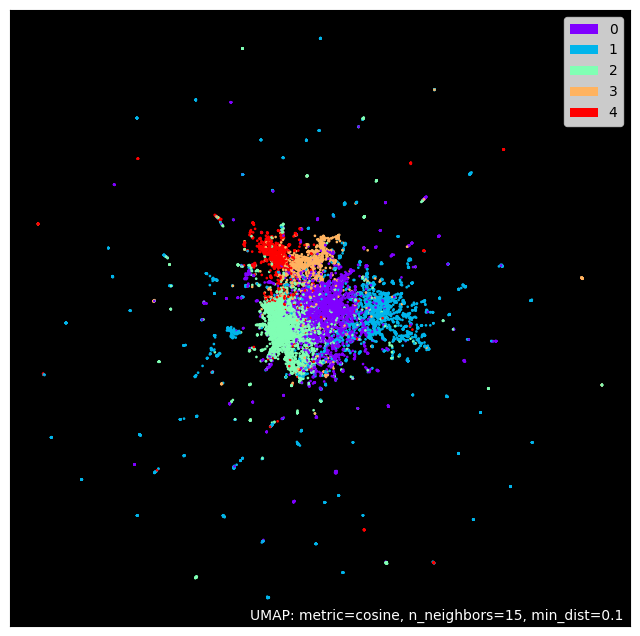

In [ ]:
umap_args={'n_neighbors': 15,'n_components': 2,'metric': 'cosine','min_dist':0.1,'random_state':42}
umap_model = umap.UMAP(**umap_args).fit(model_all._get_document_vectors(norm=False))
umap_fig1 = umap.plot.points(umap_model, labels = model_all.doc_top, theme='fire')

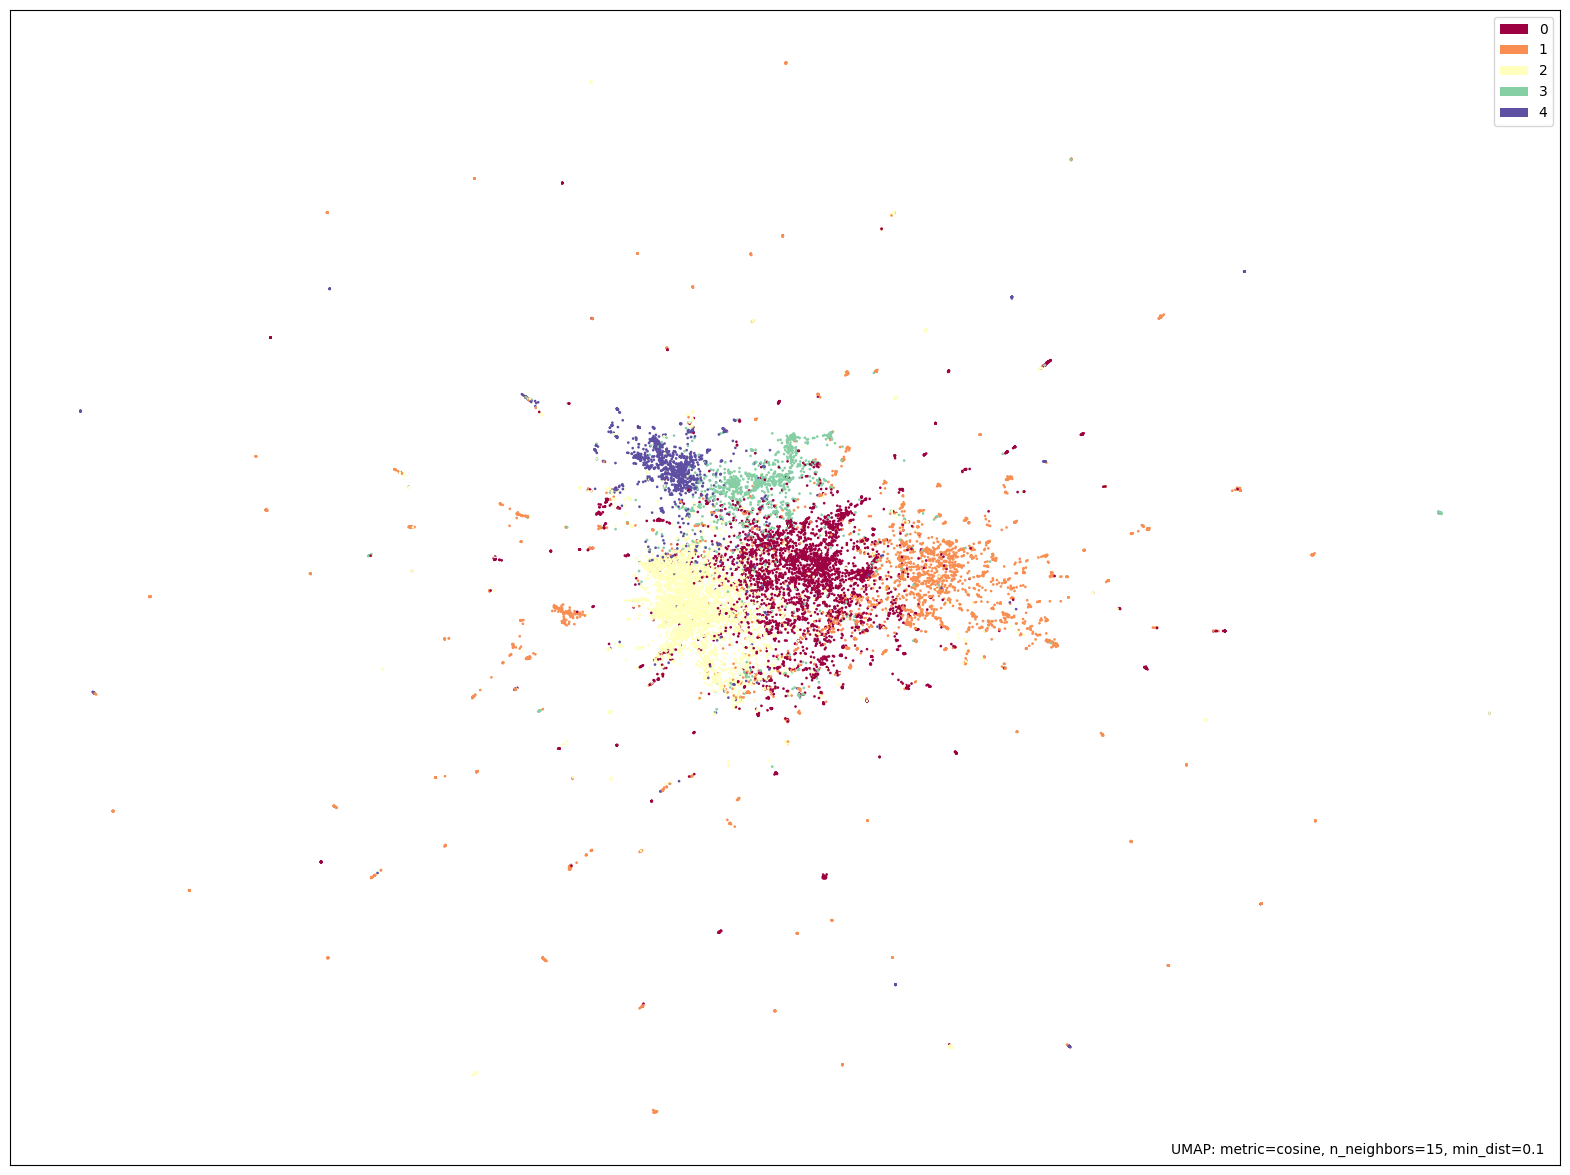

In [ ]:
umap_fig2 = umap.plot.points(
    umap_model,
    labels= model_all.doc_top,
    width=2000,
    height=1500,
)

In [ ]:
umap_args = {'n_neighbors': 30,'n_components': 2,'metric': 'cosine','min_dist':0.1,'random_state':42}

# Step 1: UMAP projection
umap_model = umap.UMAP(**umap_args).fit(model_all._get_document_vectors(norm=False))
umap_embedding = umap_model.transform(model_all._get_document_vectors(norm=False))


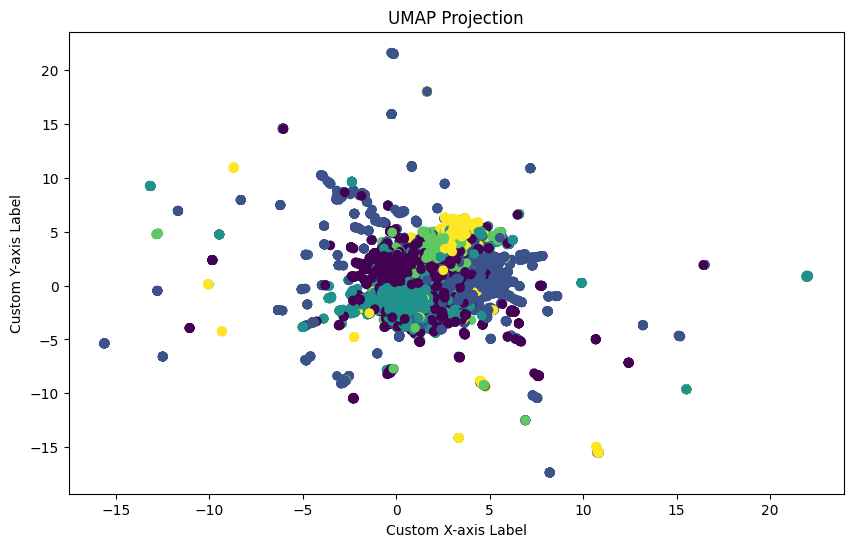

In [ ]:
# Create a scatter plot with custom x-axis and y-axis labels
plt.figure(figsize=(10, 6))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=model_all.doc_top)

# Customize x-axis and y-axis labels
plt.xlabel("Custom X-axis Label")
plt.ylabel("Custom Y-axis Label")

plt.title("UMAP Projection")
plt.show()

In [ ]:
print(len(umap_embedding[:, 0]), umap_embedding[:, 1])

14543 [  6.1202292  -14.900197   -14.946281   ...   3.0207036   11.590365
   0.48356465]


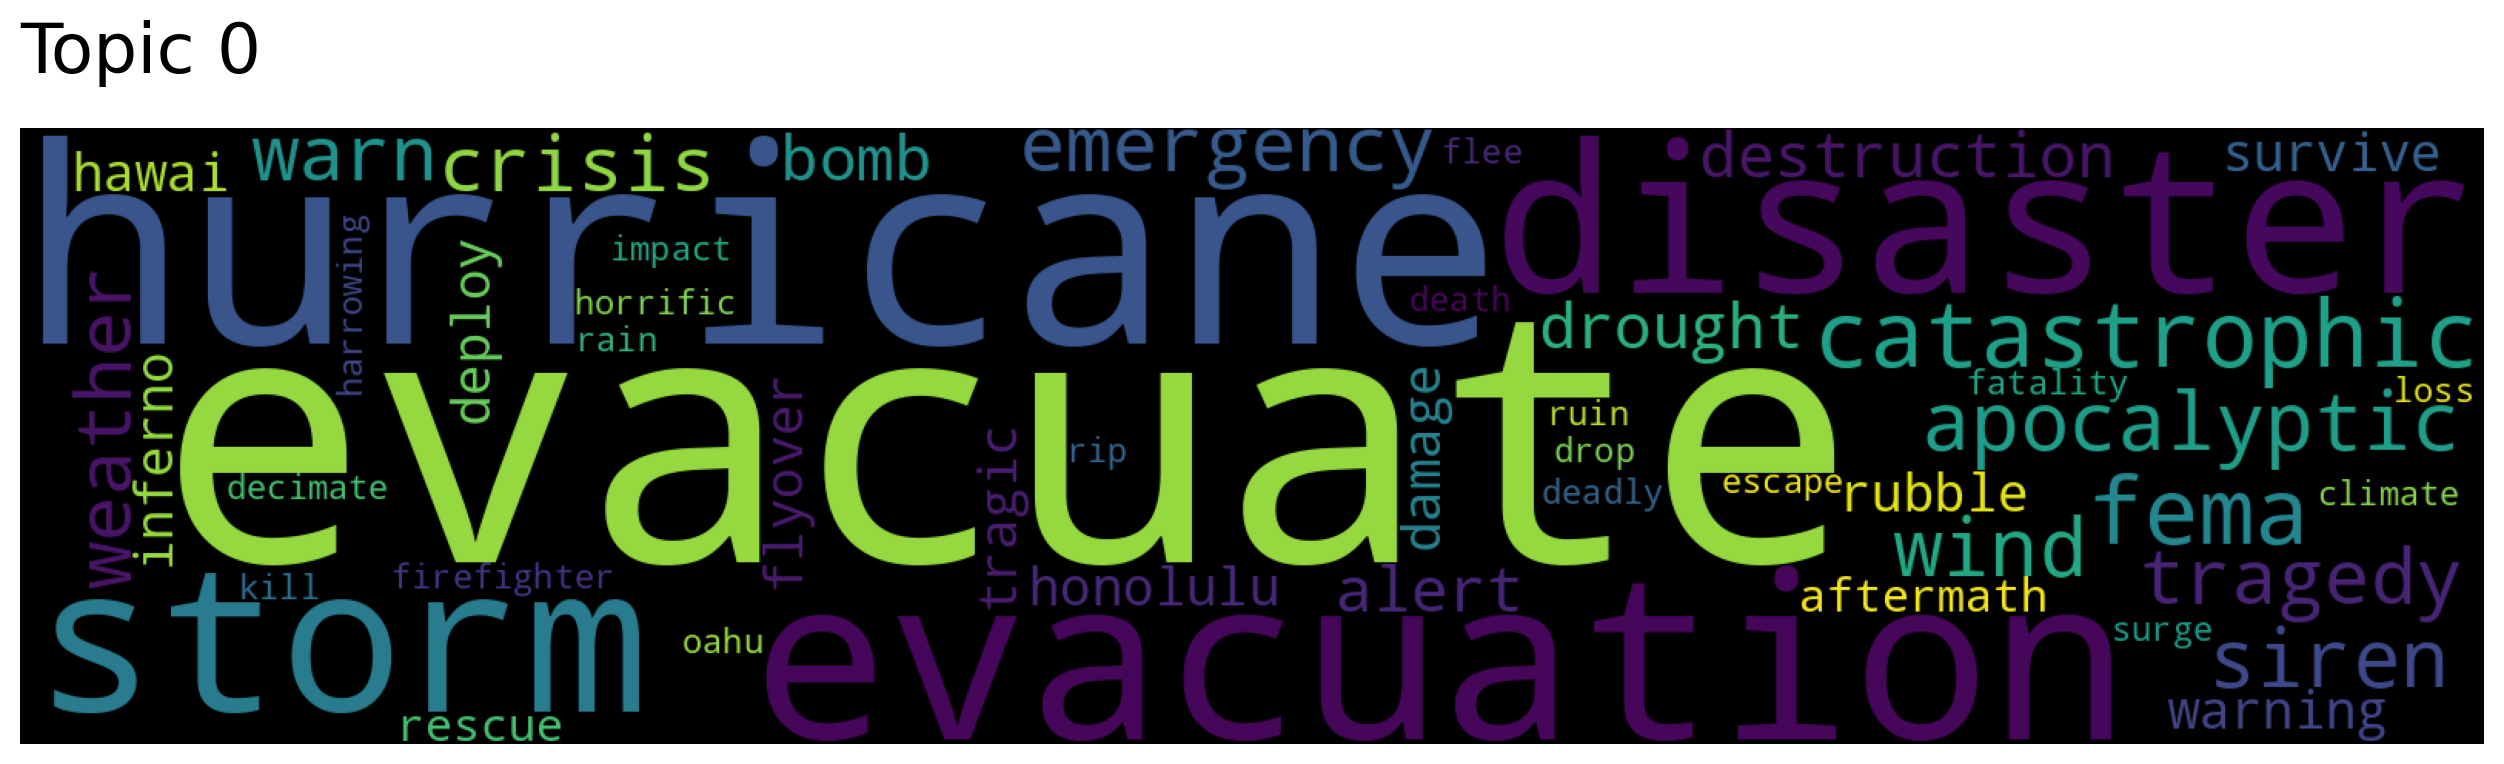

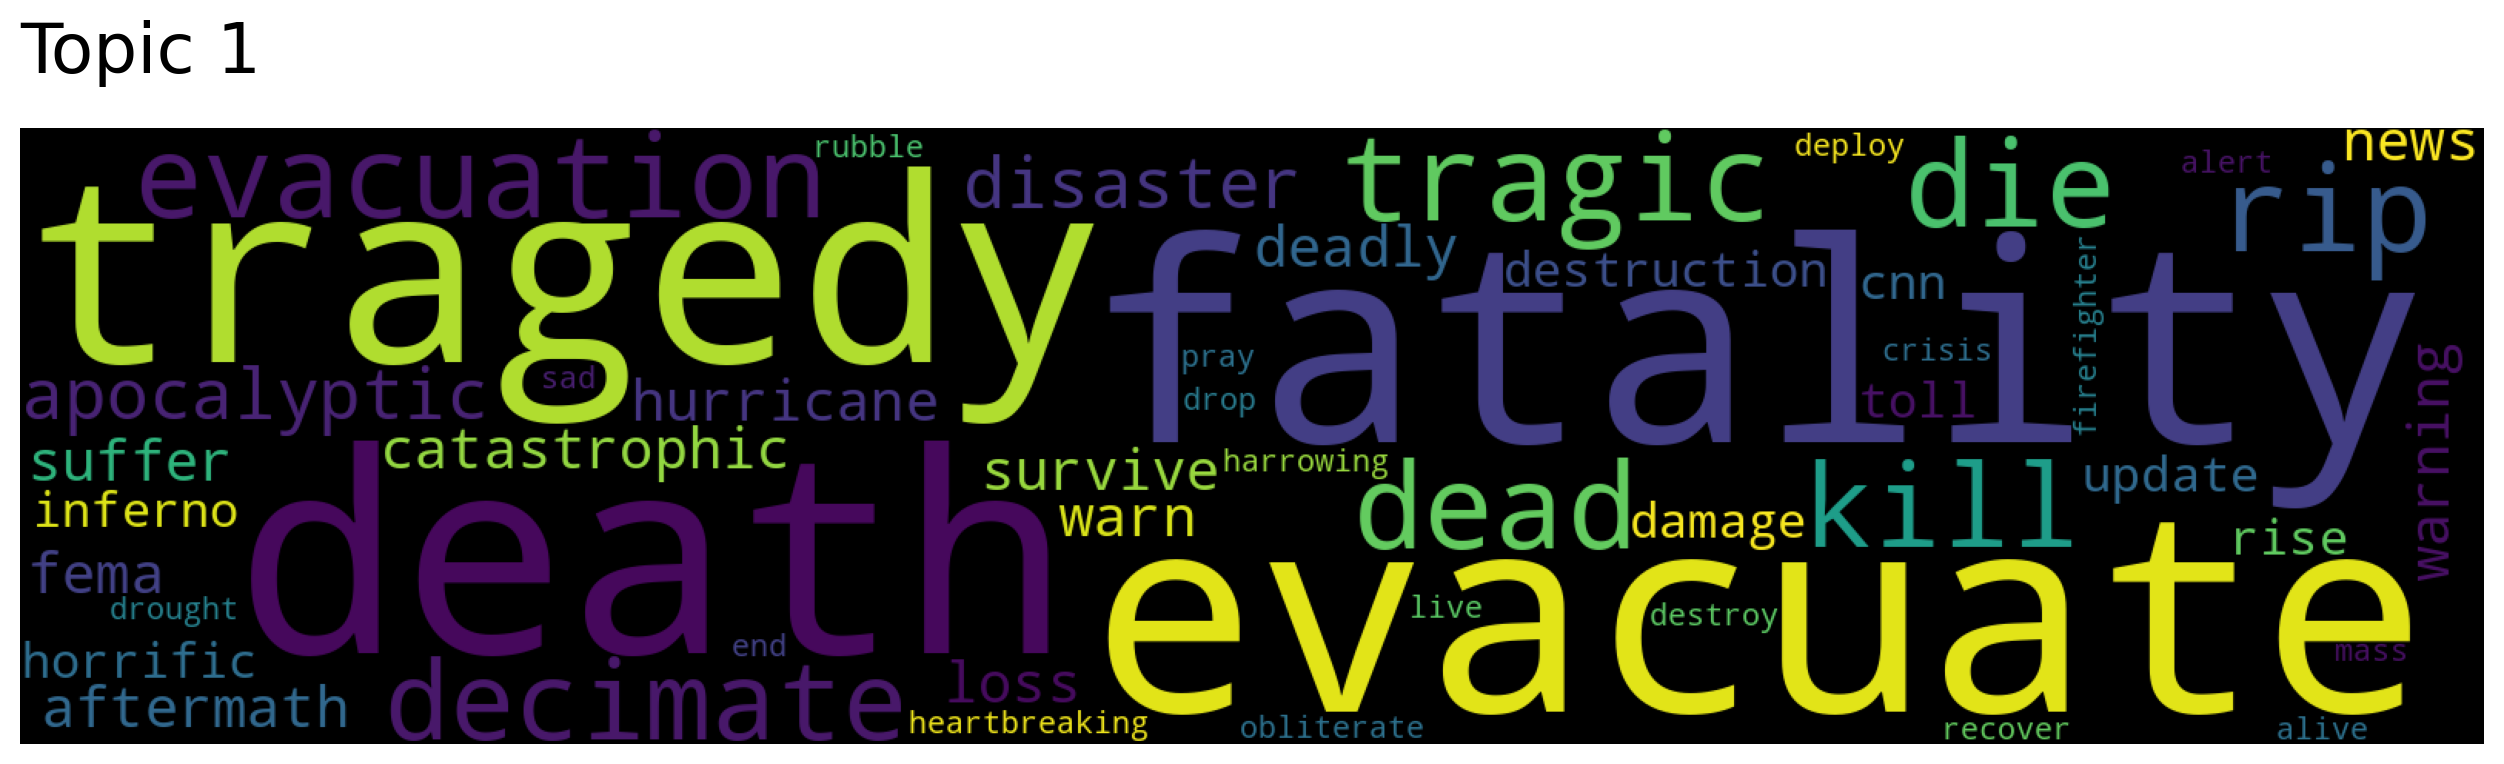

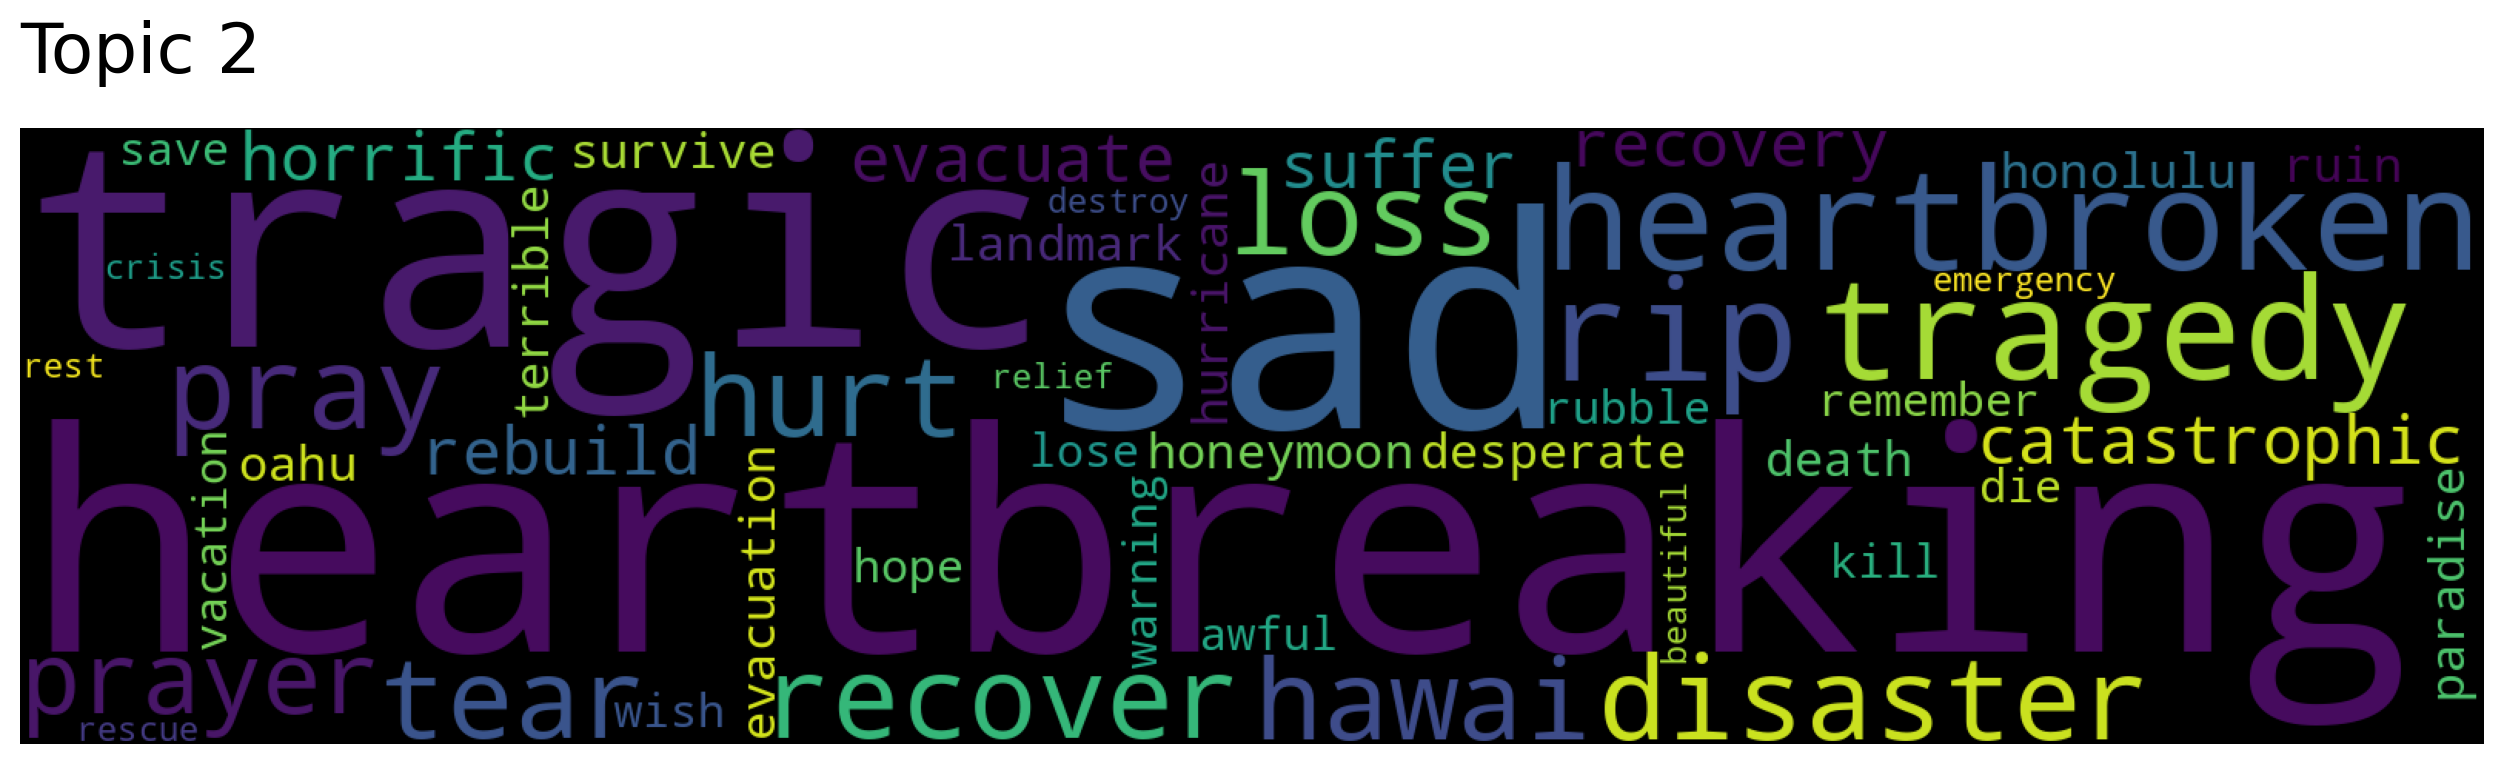

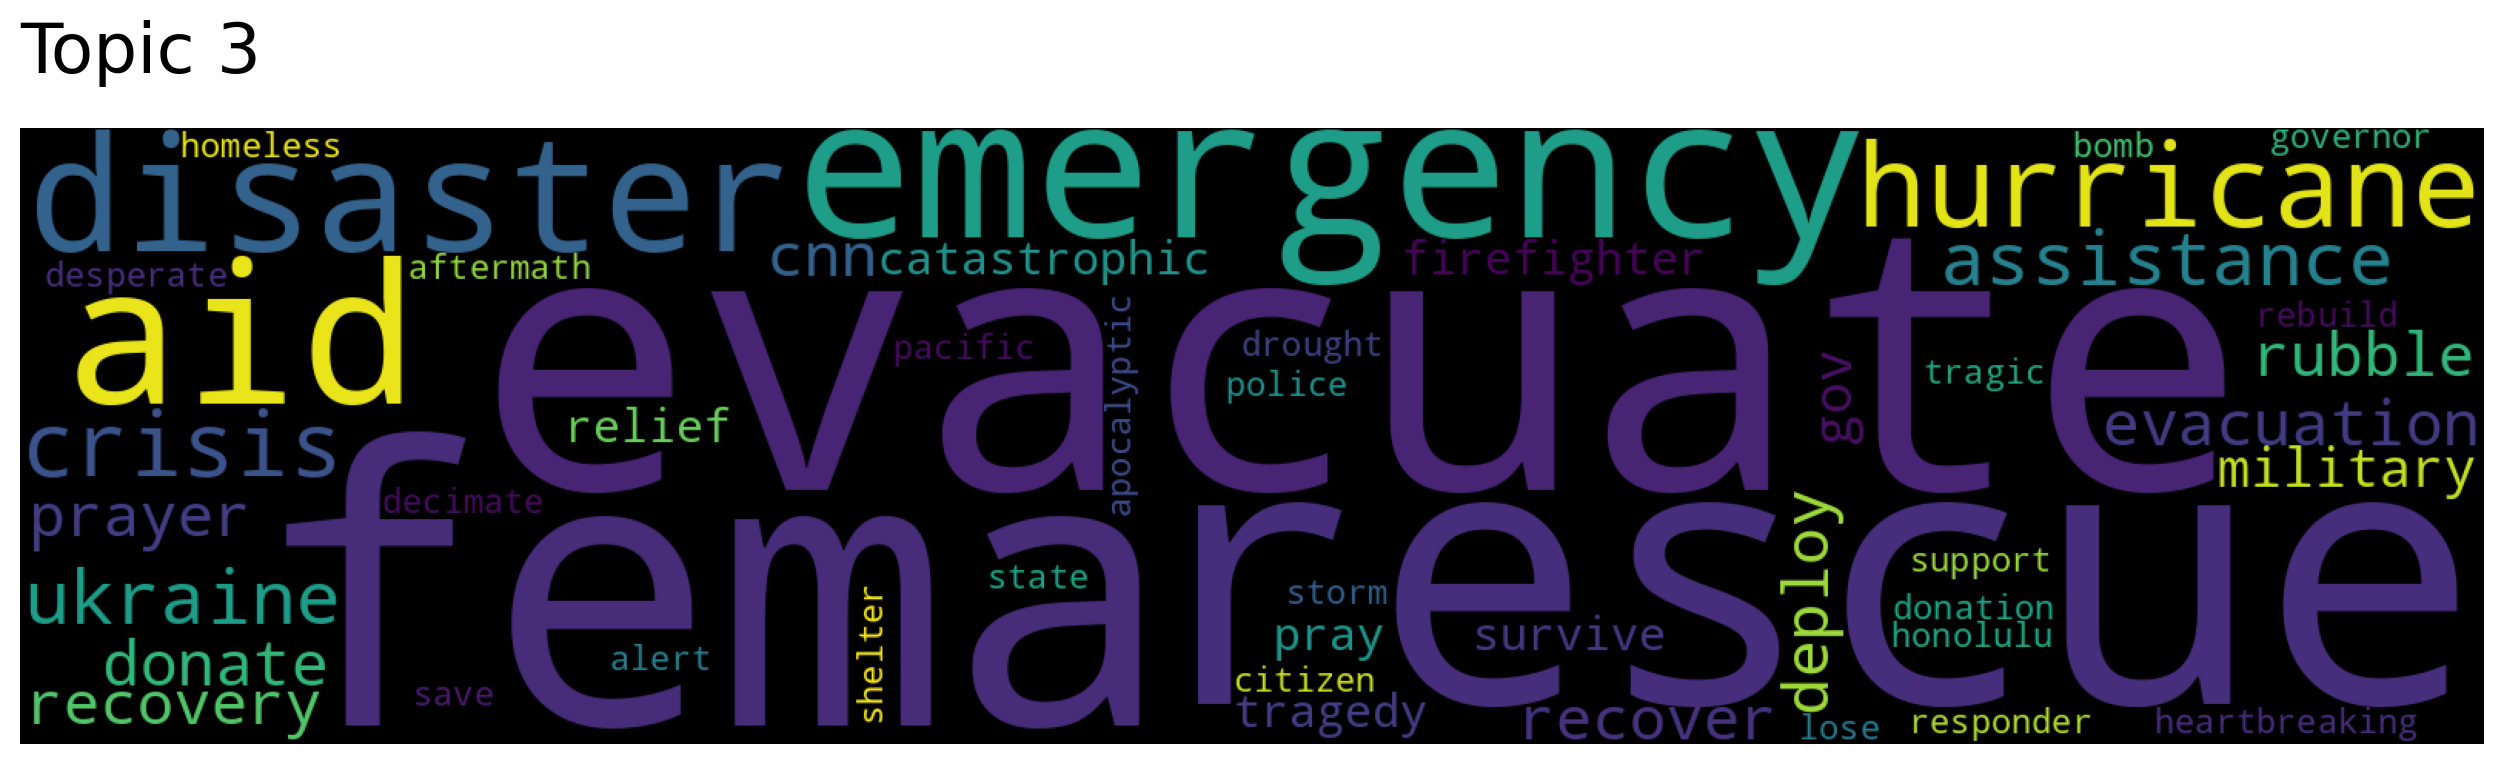

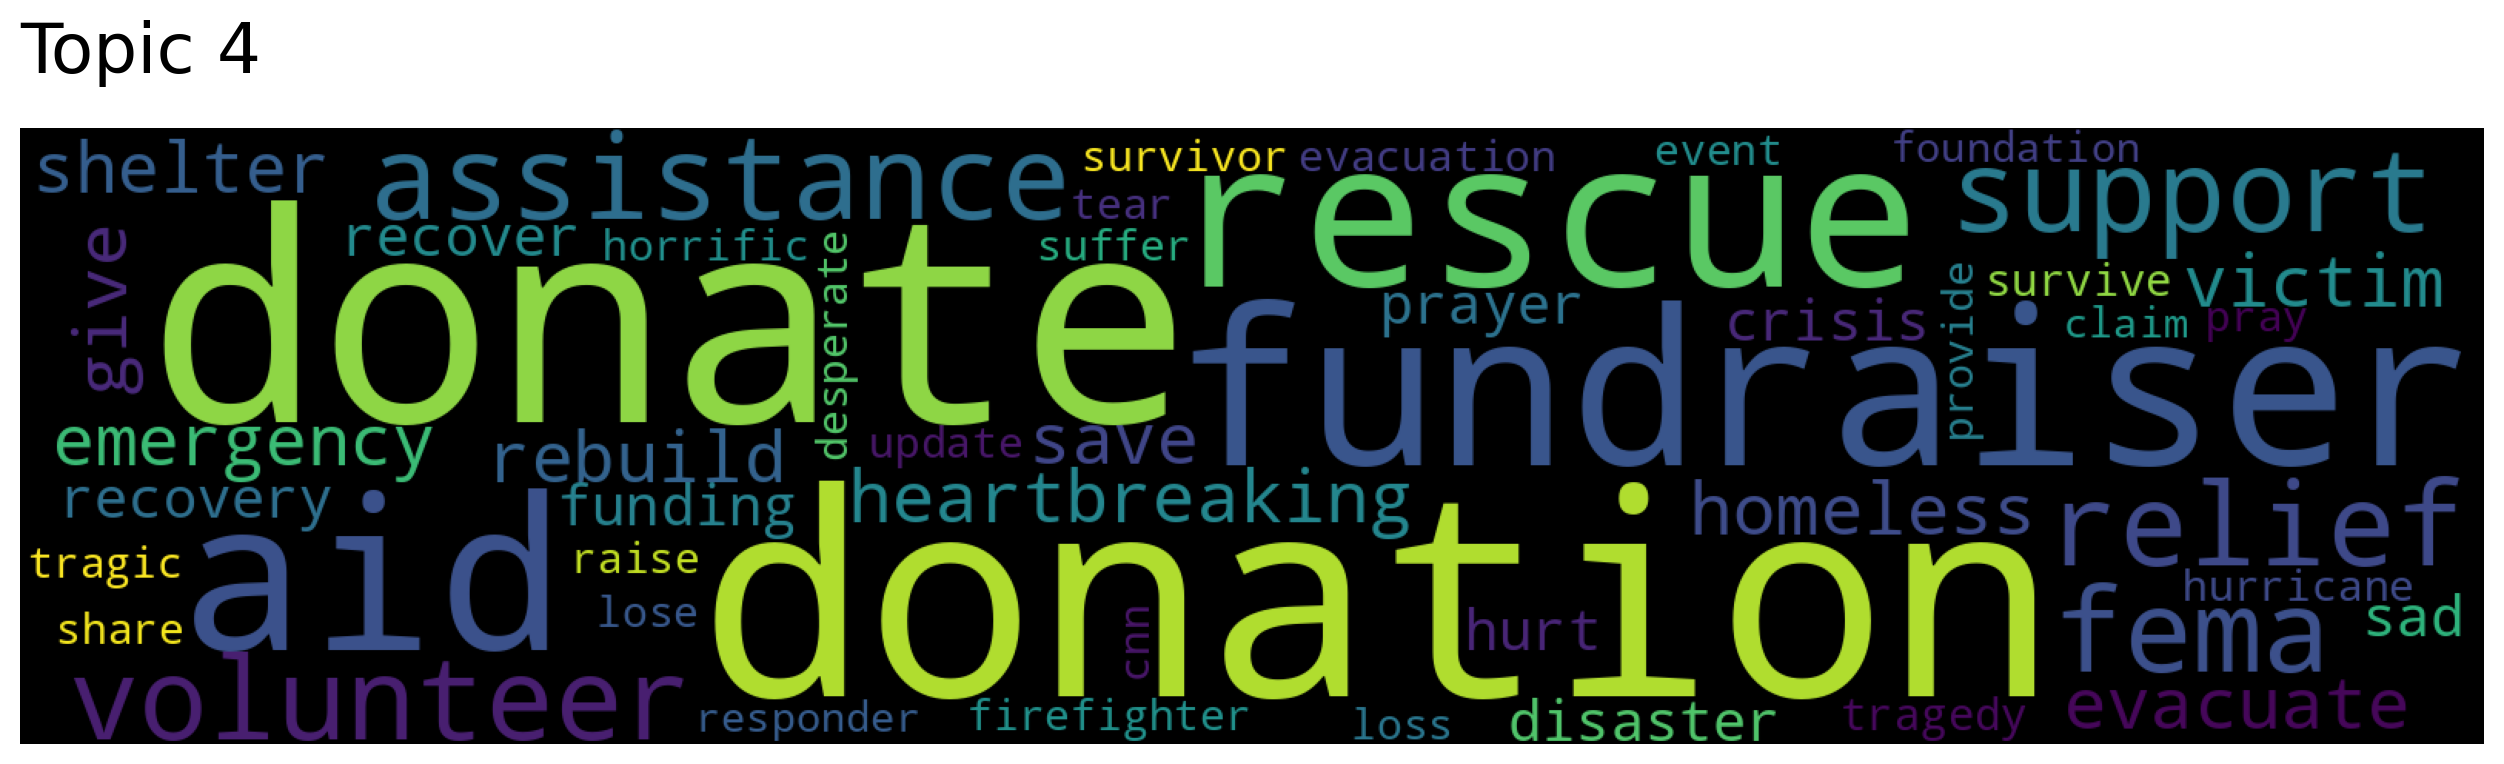

In [ ]:
# @title Default title text
topic_words, word_scores, topic_nums = model_all.get_topics()
for topic in topic_nums:
    model_all.generate_topic_wordcloud(topic)

### Results of the above model - if required

In [ ]:
word_count = 15

topic_words, word_scores, topic_nums = model_all.get_topics()

In [ ]:
res_df = pd.DataFrame(columns = ['Original_Tweets','Document', 'Topic', 'Score', 'Words - Freq','All_topics', 'umap-x', 'umap-y'])
res_df['Original_Tweets'] = df.FormattedHitSentence.tolist()
res_df['Document'] = df.Initial_conv_preprocessed.tolist()
res_df['Topic'] = model_all.doc_top
res_df['Score'] = model_all.doc_dist
res_df['All_topics'] = tuple(model_all.doc_dist_all_ordered)
res_df['umap-x'] = umap_embedding[:, 0]
res_df['umap-y'] = umap_embedding[:, 1]

for i, row in res_df.iterrows():
    print(i)
    print(f"Document: {i}", end='\r', flush=True)
    top = res_df.loc[i, :]['Topic']
    res_df.loc[i, 'Words - Freq'] =  str(tuple(topic_words[top][:word_count]))

res_df

In [ ]:
res_df

,Original_Tweets,Document,Topic,Score,Words - Freq,All_topics,umap-x,umap-y
0,Questions Raised Over Warnings in Maui Wildfir...,question raise warning small woke country mn...,11,0.360577,"('evacuate', 'evacuation', 'fema', 'hurricane'...","{52: 0.122009, 47: 0.22369501, 33: 0.06844957,...",2.018088,2.801505
1,"As death toll from Maui fire reaches 93, autho...",death toll reach authority effort count loss s...,6,0.629723,"('death', 'fatality', 'tragedy', 'tragic', 'de...","{52: 0.10753116, 47: 0.4884546, 33: 0.3371175,...",-0.173395,21.523926
2,"As death toll from Maui fire reaches 93, autho...",death toll reach authority effort count loss s...,6,0.629723,"('death', 'fatality', 'tragedy', 'tragic', 'de...","{52: 0.10753116, 47: 0.4884546, 33: 0.3371175,...",-0.161128,21.511673
3,Lost in the complete devastation that these fi...,lose complete cause eastern pacific see spri...,21,0.537090,"('firefighter', 'blaze', 'inferno', 'scorch', ...","{52: 0.09088826, 47: 0.39411107, 33: 0.2400662...",4.183750,1.360744
4,"As death toll from Maui fire reaches 93, autho...",death toll reach authority effort count loss s...,6,0.629723,"('death', 'fatality', 'tragedy', 'tragic', 'de...","{52: 0.10753116, 47: 0.4884546, 33: 0.3371175,...",-0.158611,21.509165
...,...,...,...,...,...,...,...,...
14538,SHELTERS (Includes non-county) Kahului: *Maui...,shelter include non - county high school * kin...,5,0.241779,"('donate', 'donation', 'aid', 'fundraiser', 'a...","{52: 0.04664061, 47: 0.019742642, 33: 0.089175...",1.578688,-0.337154
14539,We left Lahaina earlier this afternoon on a ...,leave early afternoon vacuolation tell cell se...,1,0.667423,"('prayer', 'pray', 'heartbreaking', 'tragedy',...","{52: 0.124843076, 47: 0.27064174, 33: 0.109212...",1.366670,-0.696566
14540,"I'm in Honolulu, which is on O‘ahu -- differ...",honolulu o'ahu different island yeah totally s...,12,0.601582,"('escape', 'jump', 'ocean', 'evacuate', 'evacu...","{52: 0.072950475, 47: 0.3494931, 33: 0.0567111...",-0.065826,0.312640
14541,Buy Verified Transferwise Account ✅ Email: smm...,buy verification transferwise account email ...,49,0.206188,"('ring', 'phone', 'call', 'desperate', 'search...","{52: 0.107063696, 47: -0.042176887, 33: 0.1065...",-9.326900,-4.252753


In [ ]:
res_df.to_excel('res_intial_hawaii_large dataset_report2.xlsx', index=False)